In [1]:
%config Completer.use_jedi = False
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

import sys
sys.path.append("/end/home/rh2310/morpho_repo/amplitude_method")
from utils import *

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

#### Define a list of parameters

In [3]:
A, B, C = symbols('A, B, C', real=True, positive = True)

D_A, D_B = symbols('D_A, D_B', real=True, positive = True)

(b_A, b_B, b_C,
 V_A, V_B, V_C,
K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
μ_A, μ_B, μ_C) = symbols(
    'b_A, b_B, b_C, V_A, V_B, V_C, K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC, mu_A, mu_B, mu_C', 
    real=True, positive = True)

k, n = symbols('k, n', integer=True)

> The PDEs are as follows

<h3><center>$
     \frac{\partial A}{\partial t} = b_A  +   V_A  \frac{1}{1+\left(\frac{K_{AA}}{A }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BA} }\right)^{n}} -  \mu_A A + D_A \nabla^2 A,
$</center></h3>

<h3><center>$     \frac{\partial B}{\partial t} = b_B  +   V_B  \frac{1}{1+\left(\frac{K_{AB}}{A }\right)^{n}} \frac{1}{1+\left(\frac{C}{K_{CB} }\right)^{n}} -  \mu_B B + D_B \nabla^2 B,
$</center></h3>

<h3><center>$
\frac{\partial C}{\partial t} = b_C  +   V_C  \frac{1}{1+\left(\frac{A}{K_{AC} }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BC} }\right)^{n}} \frac{1}{1+\left(\frac{K_{CC}}{C }\right)^{n}} -  \mu_C C,
$</center></h3>

![Circute 3954](3954.png "Circute 3954")

Then, we define kinetic terms as

<h3><center>$f_A(A, B, C) = b_A  +   V_A  \frac{1}{1+\left(\frac{K_{AA}}{A }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BA} }\right)^{n}} -  \mu_A A$</center></h3>
<h3><center>$f_B(A, B, C) = b_B  +   V_B  \frac{1}{1+\left(\frac{K_{AB}}{A }\right)^{n}} \frac{1}{1+\left(\frac{C}{K_{CB} }\right)^{n}} -  \mu_B B$</center></h3>
<h3><center>$f_C(A, B, C) = b_C  +   V_C  \frac{1}{1+\left(\frac{A}{K_{AC} }\right)^{n}} \frac{1}{1+\left(\frac{B}{K_{BC} }\right)^{n}} \frac{1}{1+\left(\frac{K_{CC}}{C }\right)^{n}} -  \mu_C C$</center></h3>


In [4]:
def act(x, K, n):
    return 1/(1 + (K/x)**n)

def inh(x, K, n):
    return 1/(1 + (x/K)**n)


fA = b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - μ_A * A
fB = b_B + V_B*act(A, K_AB, n)*inh(C, K_CB, n) - μ_B * B
fC = b_C + V_C*inh(A, K_AC, n)*inh(B, K_BC, n)*act(C, K_CC, n) - μ_C * C

lprint(r"$f_A(A, B, C) =$ {0}", fA)
lprint(r"$f_B(A, B, C) =$ {0}", fB)
lprint(r"$f_C(A, B, C) =$ {0}", fC)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [5]:
Kinetic = Matrix([[fA], [fB], [fC]])
lprint(r"$\boldsymbol{f}(A, B, C) =$ {0} ", Kinetic)

<IPython.core.display.Latex object>

#### First, we find the fix points of the system without diffusion. 


The solution of the above system finds $A^*, B^*, C^*$ such that
<center>$f_A(A^*, B^*, C^*) = 0$</center>
<center>$f_B(A^*, B^*, C^*) = 0$</center>
<center>$f_C(A^*, B^*, C^*) = 0$</center>

In [6]:
f1 = lambdify([n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
               A,B,C], 
              fA,
              modules='numpy')

f2 = lambdify([n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
               A,B,C], 
              fB,
              modules='numpy')

f3 = lambdify([n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
               A,B,C], 
               fC,
              modules='numpy')

def create_func(n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
                    K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC):
    def f_1(args):
        A,B, C = args
        return (f1(n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
                   K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC, A, B, C),
               f2(n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
                   K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC, A, B, C),
               f3(n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
                   K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC, A, B, C)) 
    
    return f_1

# Test finding the steady state solutions

In [7]:
func = create_func(n=4, b_A=.1, b_B=.1, b_C=.1, μ_A=1.0, μ_B=1.0, μ_C=1.0,
                         V_A=1.0, V_B=1.0, V_C=1.0,
                         K_AA=10., K_AB=1., K_AC=1., K_BA=1., K_BC=1., K_CB=1., K_CC=1.)

from scipy.optimize import fsolve

root = fsolve(func, [1, 1, 1], xtol=1e-10, maxfev=100000)
print(root)
print(func(root))

[0.10000001 0.10009998 0.10010037]
(0.0, 0.0, 0.0)


In [20]:
lprint(r"$f_A(A, B, C) =$ {0}", fA)
lprint(r"$d f_A/d b_A =$ {0}", fA.diff(b_A))
lprint(r"$d f_A/d μ_A =$ {0}", fA.diff(μ_A))
lprint(r"$d f_A/d V_A =$ {0}", fA.diff(V_A))
lprint(r"$d f_A/d K_{AA} =$ {0}", fA.diff(K_AA))
lprint(r"$d f_A/d K_{BA} =$ {0}", fA.diff(K_BA))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
lprint(r"$f_B(A, B, C) =$ {0}", fB)
lprint(r"$d f_B/d b_B =$ {0}", fB.diff(b_B))
lprint(r"$d f_B/d μ_B =$ {0}", fB.diff(μ_B))
lprint(r"$d f_B/d V_B =$ {0}", fB.diff(V_B))
lprint(r"$d f_B/d K_{AB} =$ {0}", fB.diff(K_AB))
lprint(r"$d f_B/d K_{CB} =$ {0}", fB.diff(K_CB))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
lprint(r"$f_C(A, B, C) =$ {0}", fC)
lprint(r"$d f_C/d b_C =$ {0}", fC.diff(b_C))
lprint(r"$d f_C/d μ_C =$ {0}", fC.diff(μ_C))
lprint(r"$d f_C/d V_C =$ {0}", fC.diff(V_C))
lprint(r"$d f_C/d K_{AC} =$ {0}", fC.diff(K_AC))
lprint(r"$d f_C/d K_{BC} =$ {0}", fC.diff(K_BC))
lprint(r"$d f_C/d K_{CC} =$ {0}", fC.diff(K_CC))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Next, to linearise the PDE system, we find the Jacobian of $(f_A, f_B, f_C)$ 

In [145]:
J_jac = Kinetic.jacobian([A, B, C])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_jac)
J_jac_func = lambdify([n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
               A,B,C], 
               J_jac,
              modules='numpy')

<IPython.core.display.Latex object>

## Test the Jacobian matrix

In [146]:
J_test = J_jac_func(n=4, b_A=.1, b_B=.1, b_C=.1, mu_A=1.0, mu_B=1.0, mu_C=1.0,
                         V_A=1.0, V_B=1.0, V_C=1.0,
                         K_AA=10., K_AB=1., K_AC=1., K_BA=1., K_BC=1., K_CB=1., K_CC=1.,
                        A = root[0], B = root[1], C = root[2])
print(J_test)
from scipy.linalg import eigvals
eigvals(J_test)

[[-9.99999600e-01 -4.01120567e-11  0.00000000e+00]
 [ 3.99879983e-03 -1.00000000e+00 -4.01085172e-07]
 [-4.01447565e-07 -4.02652589e-07 -9.95989553e-01]]


array([-0.9999998 +3.46986565e-07j, -0.9999998 -3.46986565e-07j,
       -0.99598955+0.00000000e+00j])

## Including the diffusion

In [147]:
J_jac_diff = J_jac - Matrix([[D_A*k**2,   0, 0], 
                             [0, D_B*k**2, 0],
                             [0,      0, 0],
                           ])
hprint(r"J_{diff}= ", J_jac_diff)

J_jac_diff_func = lambdify([n, b_A, b_B, b_C, μ_A, μ_B, μ_C, V_A, V_B, V_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, K_CC,
               A,B,C], 
               J_jac_diff,
              modules='numpy')

J_diff_test = J_jac_diff_func(n=4, b_A=.1, b_B=.1, b_C=.1, mu_A=1.0, mu_B=1.0, mu_C=1.0,
                         V_A=1.0, V_B=1.0, V_C=1.0,
                         K_AA=10., K_AB=1., K_AC=1., K_BA=1., K_BC=1., K_CB=1., K_CC=1.,
                        A = root[0], B = root[1], C = root[2])

hprint(r"J_{diff}= ", J_diff_test)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [148]:
λ_1, λ_2, λ_3 = list(J_jac_diff.subs({n:4, b_A:.1, b_B:.1, b_C:.1, μ_A:1.0, μ_B:1.0, μ_C:1.0,
                         V_A:1.0, V_B:1.0, V_C:1.0,
                         K_AA:10., K_AB:1., K_AC:1., K_BA:1., K_BC:1., K_CB:1., K_CC:1.,
                        A:root[0], B:root[1], C:root[2]}).eigenvals().keys())
λ_1_func = lambdify([k, D_A, D_B], 
               λ_1,
              modules='numpy')
λ_2_func = lambdify([k, D_A, D_B], 
               λ_3,
              modules='numpy')
λ_3_func = lambdify([k, D_A, D_B], 
               λ_3,
              modules='numpy')


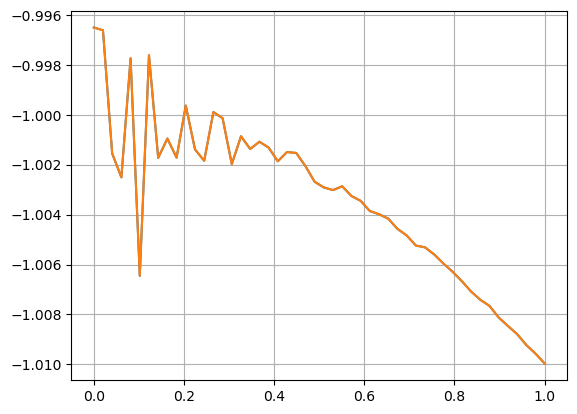

In [149]:
ks = np.linspace(0,1).astype(np.complex64)
D_A_val=.01
D_B_val=1
pl1 = λ_1_func(ks, D_A_val, D_B_val)
pl2 = λ_2_func(ks, D_A_val, D_B_val)
pl3 = λ_3_func(ks, D_A_val, D_B_val)
#plt.plot(ks, np.real(pl1))
plt.plot(ks, np.real(pl2))
plt.plot(ks, np.real(pl3))
#plt.plot(ks, np.imag(pl1))
plt.grid()